In [8]:
import numpy as np
from numpy.linalg import eigvals
import matplotlib.pyplot as plt

from matplotlib import cm
from matplotlib.colors import LogNorm
from matplotlib.animation import FuncAnimation as FA

from scipy.optimize import root, show_options

plt.rc("font", family="serif", size=16)
plt.rc("mathtext", fontset="cm")
plt.rc("lines", lw=2)

In [9]:
c = .4
x = .2

def f(x1, x2, a):
    mu1 = -2*(x1**2 - c**2)*x1 + (x+a)*x2
    mu2 = -2*(x2**2 - c**2)*x2 + (x-a)*x1
    return np.array([mu1, mu2])

D11 = lambda x1, x2, a: -4*(3*x1**2 - c**2) + 0j
D22 = lambda x1, x2, a: -4*(3*x2**2 - c**2) + 0j
D12 = lambda x1, x2, a: -(x + a) + 0j
D21 = lambda x1, x2, a: -(x - a) + 0j

l1 = lambda x1, x2, a: 1/2*( (D11(x1, x2, a) + D22(x1, x2, a)) + np.sqrt((D11(x1, x2, a) - D22(x1, x2, a))**2 + 4*D12(x1, x2, a)*D21(x1, x2, a)  ))
l2 = lambda x1, x2, a: 1/2*( (D11(x1, x2, a) + D22(x1, x2, a)) - np.sqrt((D11(x1, x2, a) - D22(x1, x2, a))**2 + 4*D12(x1, x2, a)*D21(x1, x2, a)  ))

def Cr (x1, x2, a): 
    C = np.logical_and(l1(x1, x2, a).real>0, l1(x1, x2, a).real>0)
    return np.ma.masked_where(C==0, C)

def Ci (x1, x2, a):
    C = l1(x1, x2, a).imag
    return np.ma.masked_where(C==0, C)

In [10]:
def eq(xs, *args):
    x1, x2 = xs[0], xs[1]
    a, = args
    eq1 = 2*(x1**2 - c**2)*x2 - (a - x)*x1
    eq2 = (x1**2 + x2**2 - 2*c**2)**2 - (x1**2 - x2**2)**2 + x**2 - a**2
    return np.array([eq1, eq2])

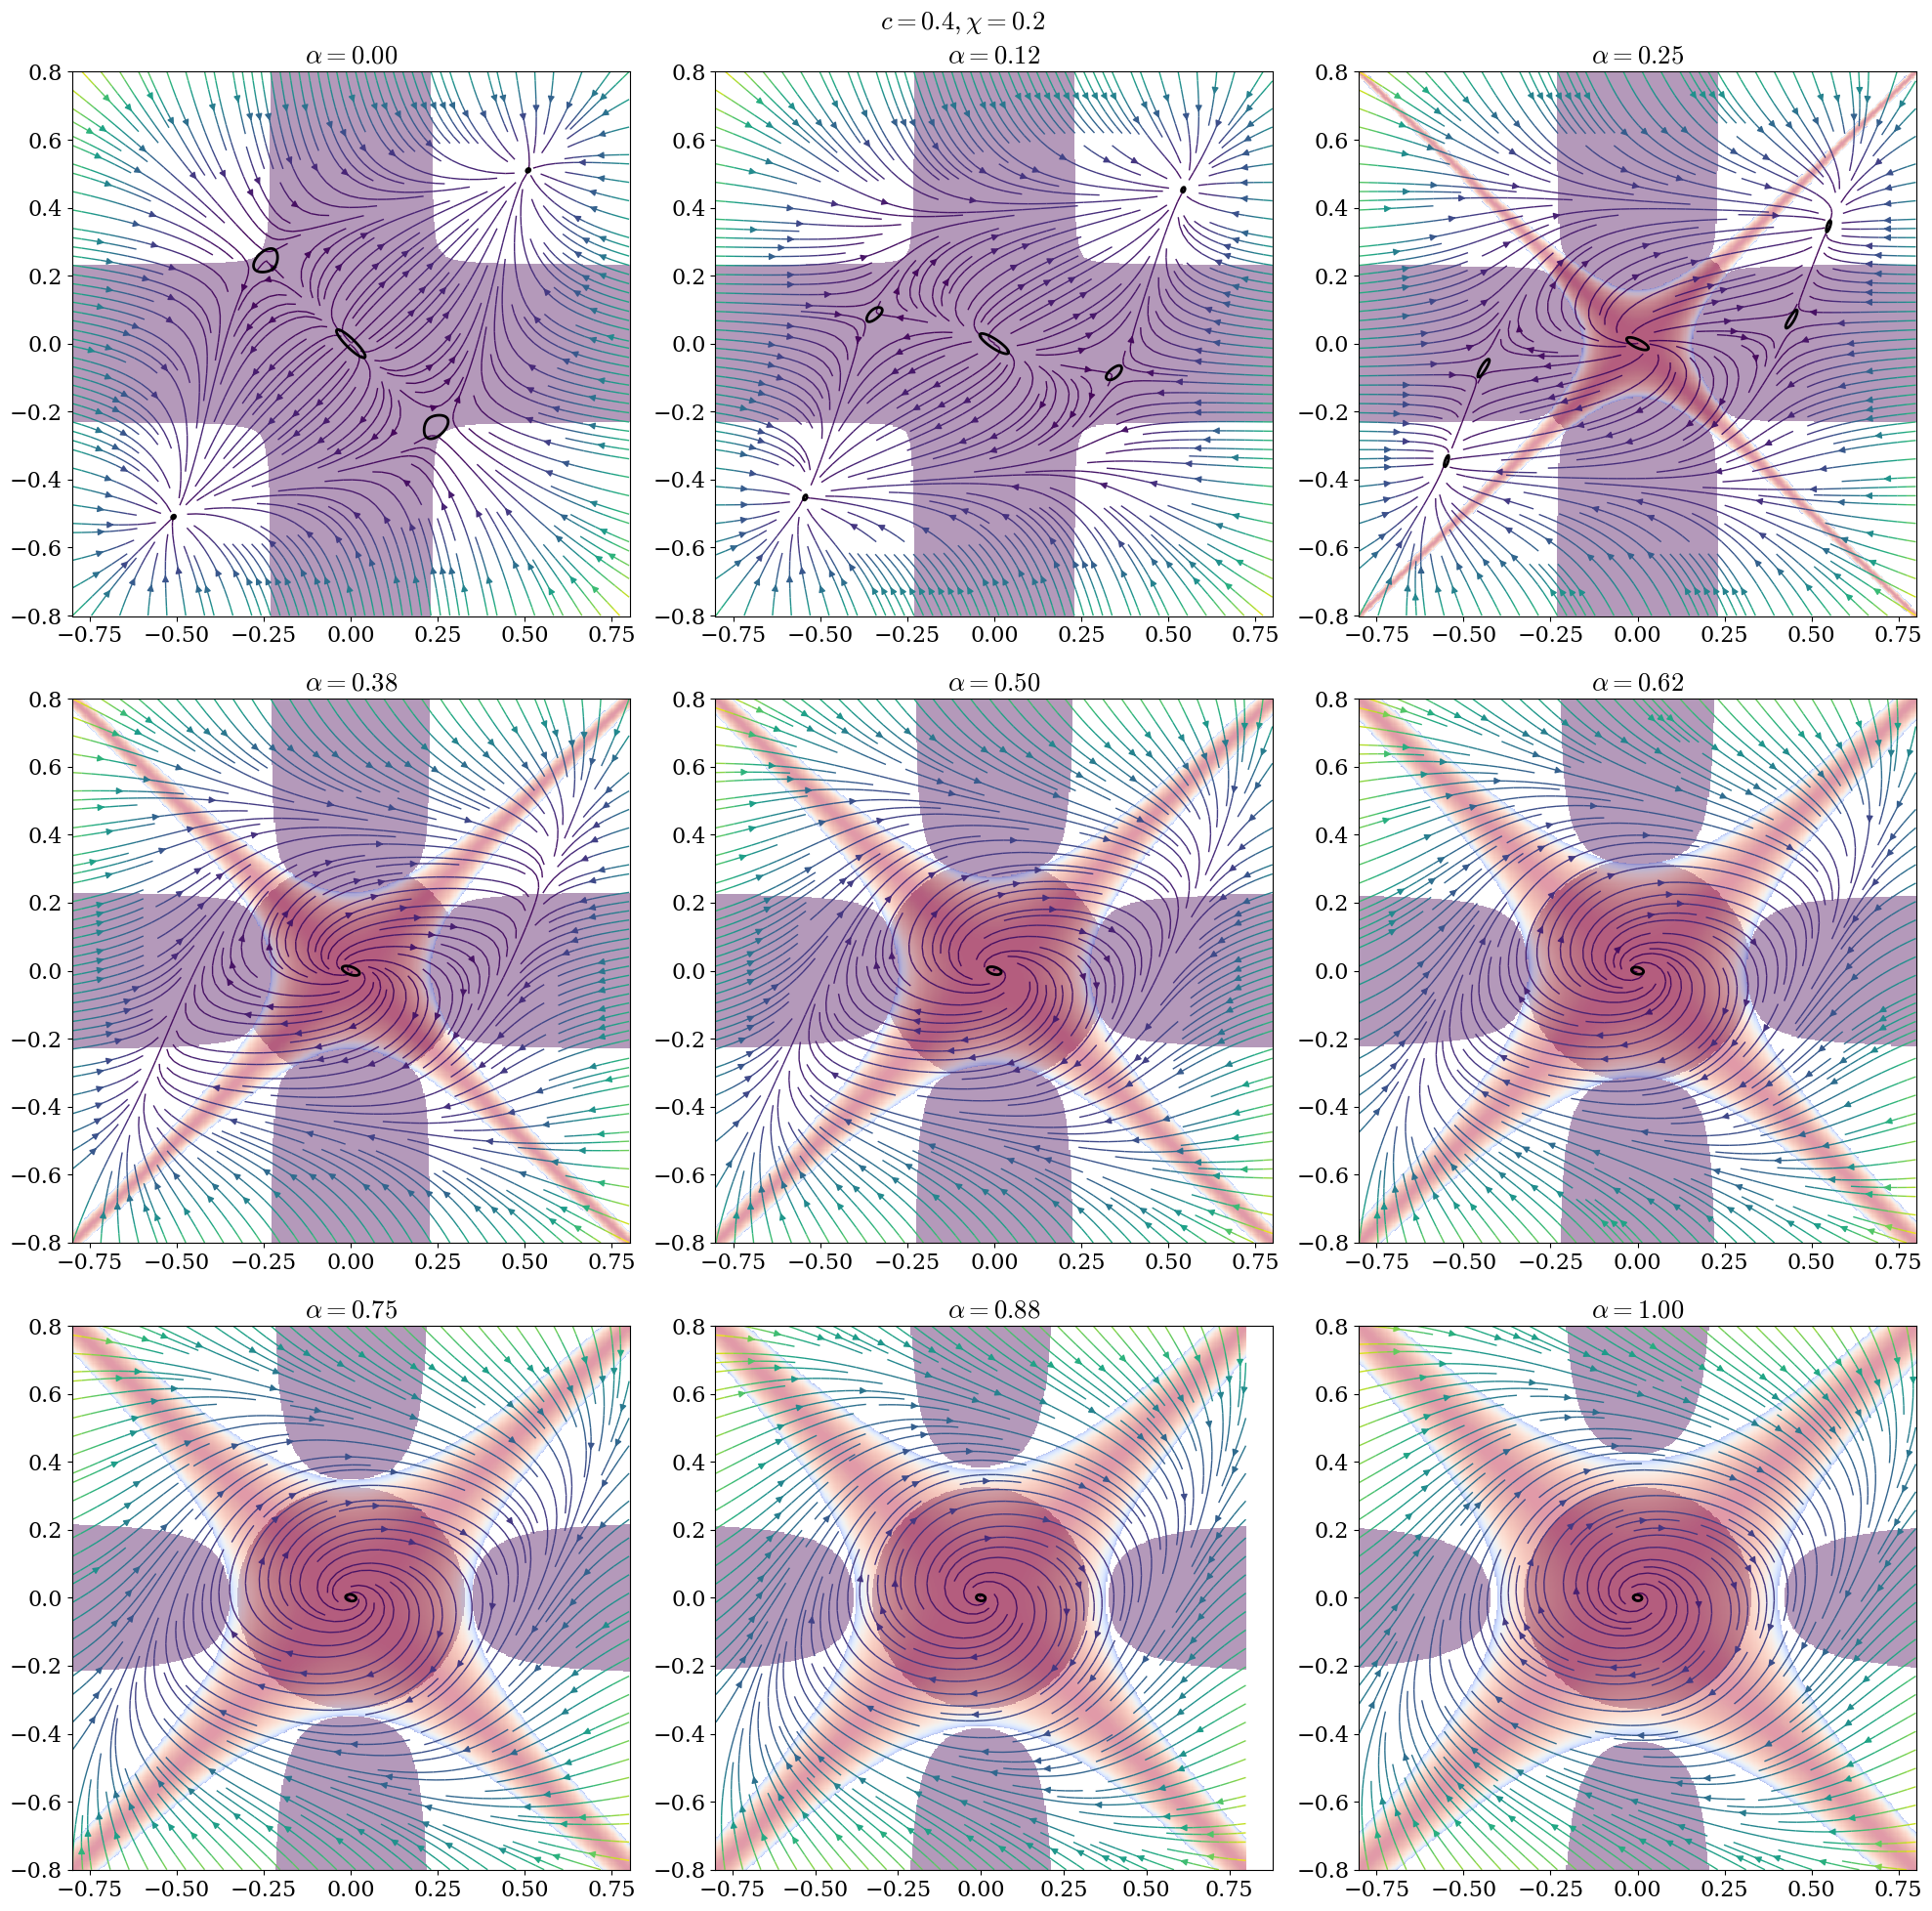

In [11]:
n = 500
r = .8
x1, x2 = np.linspace(-r, r, n), np.linspace(-r, r, n)
x1, x2 = np.meshgrid(x1, x2)

m = 3
aa = np.linspace(.0, 1, m**2)
fig, ax = plt.subplots(m, m, figsize=(20, 20))

for n, a in enumerate(aa):
    u, v = f(x1, x2, a)
    l = np.sqrt(u**2 + v**2)
    ax[n//m, n%m].pcolormesh(x1, x2, Cr(x1, x2, a), alpha=.4)
    ax[n//m, n%m].pcolormesh(x1, x2, Ci(x1, x2, a), alpha=.4, cmap='coolwarm')
    ax[n//m, n%m].streamplot(x1, x2, u, v, color=l, density=2., linewidth=1)
    # ax[n//m, n%m].quiver(x1[::10, ::10], x2[::10, ::10], u[::10, ::10], v[::10, ::10], scale=10)

    r = (np.min(l), np.max(l))
    levels = np.linspace(r[0], r[-1], 200)
    levels = levels[:2:]
    ax[n//m, n%m].contour(x1, x2, l, levels=levels, colors="black")
    ax[n//m, n%m].set_title("$\\alpha={:.2f}$".format(a))
    
    # x0s = ([.5, 0], [.5, .5], [-.5, -.5], [-.5, 0])
    # for x0 in x0s:
    #     eq = lambda x, a: f(*x, a)
    #     sol = root(eq, x0, args=(a,), options={"maxfev":1000})
    #     if sol.success==True:
    #         ax[n//m, n%m].plot(*sol.x, "rx")


fig.suptitle("$c = {}, \\chi = {}$".format(c, x))
plt.tight_layout()
plt.savefig("test.png")